<h1> A Simple Solution

In [105]:
import random

In [3]:
grammar = """
sentence = adj noun1 verb noun2
adj = 漂亮 | 蓝色 | 好看
adv = 安静地 | 静静地
noun1 = 猫 | 女人 | 男人
verb = adv 看着 | adv 坐着
noun2 = 桌子 | 皮球 
"""

In [37]:
import random
def adj(): return random.choice("漂亮 | 蓝色 | 好看".split('|'))

In [32]:
def noun1(): return random.choice("猫 | 女人 | 男人".split('|'))

In [33]:
def verb(): return random.choice("看着 | 坐着".split('|'))

In [34]:
def noun2(): return random.choice("桌子 | 皮球".split('|'))

In [38]:
def sentence(): return ''.join([adj(),noun1(),verb(),noun2()])

In [133]:
sentence()

' 好看 男人看着 桌子 '

<h1> A Syntax Tree Solution

In [76]:
def build_grammar(grammar_str,split='='):
    grammar_pattern = {}
    for line in grammar_str.split('\n'):
        if not line: continue
        stat, expr = line.split(split)
        grammar_pattern[stat.strip()] = [e.split() for e in expr.split('|')]
    return grammar_pattern

In [78]:
grammar_pattern = build_grammar(grammar)

In [87]:
'sentence' in grammar_pattern.keys()

True

In [90]:
grammar_pattern['sentence']

[['adj', 'noun1', 'verb', 'noun2']]

In [96]:
for e in grammar_pattern['sentence']:print(type(e))

<class 'list'>


In [56]:
split?

Object `split` not found.


In [16]:
grammar_pattern

[['桌子'], ['皮球']]

In [119]:
def generate(grammar_pattern, target):
    if target not in grammar_pattern.keys(): return target
    # 第一次list拆包，将sentence的list内元素取出
    expr = random.choice(grammar_pattern[target])
    # 第二次list拆包，对包内词组进行递归处理
    tokens = [generate(grammar_pattern, e) for e in expr]
    return ''.join([t for t in tokens if t != 'null'])

In [120]:
generate(build_grammar(grammar),'sentence')

'漂亮女人安静地看着桌子'

In [78]:
random.choice?

In [132]:
test = "ab cd"
a, b = test.split(' ')
print(a)
print(b)

ab
cd


In [72]:
out = grammar.split('\n')
print(type(out))
''.join([out])

<class 'list'>


TypeError: sequence item 0: expected str instance, list found

In [106]:
random.choice?

<h1>Search-Based Algorithms

In [132]:
graph = {
    'A' : 'B C',
    'B' : 'A C',
    'C' : 'A B D E',
    'D' : 'C',
    'E' : 'C F',
    'F' : 'E'
}

In [122]:
graph

{'A': 'B C', 'B': 'A C', 'C': 'A B D E', 'D': 'C', 'E': 'C F', 'F': 'E'}

In [133]:
type(graph['A'])

str

In [149]:
for k in graph:
    graph[k] = set(graph[k].split())

In [376]:
graph

{'A': {'B', 'C'},
 'B': {'A', 'C'},
 'C': {'A', 'B', 'D', 'E'},
 'D': {'C'},
 'E': {'C', 'F'},
 'F': {'E'}}

In [377]:
type(graph['A'])

set

In [179]:
seen = set()

In [180]:
need_visited = ['A']

<h1>Breadth First Search

In [181]:
## need_visited 以列表形式存储与正在访问节点相连的其他节点，初值为'A'
## seen 以集合方式存储已经访问的节点
while need_visited:
    node = need_visited.pop(0)
    print(' I am looking at : {}'.format(node))
    if node in seen:continue
        ## 对该元素进行操作
        ##{...}
    seen.add(node)
    need_visited += graph[node]
    
    

 I am looking at : A
 I am looking at : C
 I am looking at : B
 I am looking at : D
 I am looking at : E
 I am looking at : A
 I am looking at : B
 I am looking at : C
 I am looking at : A
 I am looking at : C
 I am looking at : C
 I am looking at : F
 I am looking at : E


In [251]:
common_fruits = set(['apple','pearl','banana'])

In [252]:
fruits = ['apricot','pear','apple']

In [253]:
fruits += common_fruits

In [254]:
fruits

['apricot', 'pear', 'apple', 'apple', 'pearl', 'banana']

In [255]:
set(fruits)

{'apple', 'apricot', 'banana', 'pear', 'pearl'}

## Deepth First Search

1.创建已访问集合seen与待访问列表need_visited,将初始节点A添加need_visited；
2.从need_visited取出第一个元素，存入node变量，并在need_visited中删除；
3.查看node是否在seen中，如在则跳至步骤2，否则继续；
4.查看node相连的节点是否有未访问节点，若有，则；


In [358]:
graph_long = {
    '1' : '2 7',
    '2' : '1 3',
    '3' : '2 4',
    '4' : '3 5',
    '5' : '4 6 10',
    '6' : '5',
    '7' : '1 8',
    '8' : '7 9',
    '9' : '8 10',
    '10': '5 9 11',
    '11': '10 12',
    '12': '11'
}



In [359]:
need_visited = ['1']
seen = set()
for e in graph_long:
    graph_long[e] = graph_long[e].split()

In [360]:
graph_long

{'1': ['2', '7'],
 '10': ['5', '9', '11'],
 '11': ['10', '12'],
 '12': ['11'],
 '2': ['1', '3'],
 '3': ['2', '4'],
 '4': ['3', '5'],
 '5': ['4', '6', '10'],
 '6': ['5'],
 '7': ['1', '8'],
 '8': ['7', '9'],
 '9': ['8', '10']}

In [361]:
while need_visited:
    node = need_visited.pop(0)
    if node in seen: continue
        ## 进行处理操作
    print(" I am looking at {}".format(node))
    seen.add(node)
    need_visited = graph_long[node] + need_visited

 I am looking at 1
 I am looking at 2
 I am looking at 3
 I am looking at 4
 I am looking at 5
 I am looking at 6
 I am looking at 10
 I am looking at 9
 I am looking at 8
 I am looking at 7
 I am looking at 11
 I am looking at 12


In [366]:
set1 = ['1','2']

In [367]:
list2 = ['3', '4']

In [368]:
list3 =+ set1

TypeError: bad operand type for unary +: 'list'

In [375]:
a = range(3)
print(type(a))
b = a
id(a) is id(b)

<class 'range'>


False

In [372]:
a

range(0, 3)

In [307]:
seen

{'1'}

In [378]:
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLG = 'Heilongjiang'
NY = 'New York City'
CM = 'ChiangMai'
SG = 'Singapore'

In [382]:
air_route = {
    BJ : {SZ, GZ, WH, HLG, NY},
    GZ : {WH, BJ, CM},
    SZ : {BJ, SG},
    WH : {BJ, GZ},
    HLG : {BJ},
    CM : {GZ},
    NY : {BJ}
}

In [384]:
import networkx

In [385]:
air_route = networkx.Graph(air_route)

In [387]:
%matplotlib inline

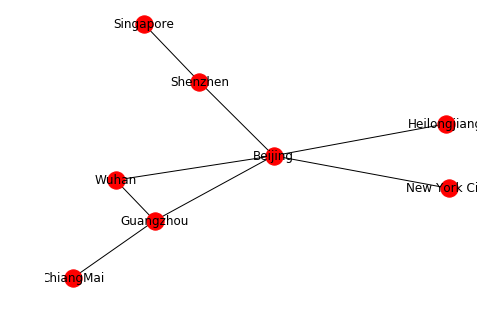

In [390]:
networkx.draw(air_route, with_labels=True)

In [400]:
def search_destination(graph, start, destination):
    pathes = [[start]]
    seen = set()
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        if frontier in seen: continue
        seen.add(frontier)
        for city in graph[frontier]:
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination:return new_path
    return None

In [407]:
search_destination(air_route, 'Heilongjiang', 'ChiangMai')

['Heilongjiang', 'Beijing', 'Guangzhou', 'ChiangMai']